# Capstone Analysis & Visuals (Jupyter Summary)
# This notebook explores the relationship between food access and chronic disease

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Set up paths (assumes this notebook is in /notebooks)
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
data_path = os.path.join(project_root, "data", "processed", "merged_summary.csv")

# Load merged data
df = pd.read_csv(data_path)

# Preview data
print("Data shape:", df.shape)
df.head()

# Rename columns for clarity (optional)
df = df.rename(columns={
    "Obesity among adults": "Obesity",
    "Diabetes among adults": "Diabetes",
    "High blood pressure among adults": "BloodPressure"
})

Data shape: (51, 28)


### Correlation Heatmap

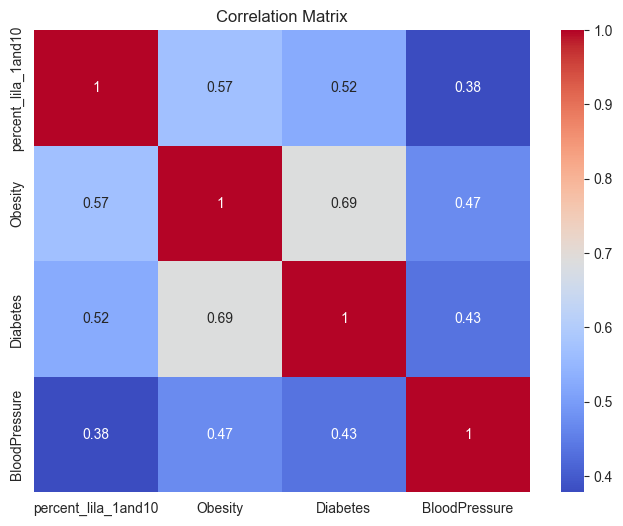

In [4]:
plt.figure(figsize=(8, 6))
corr = df[["percent_lila_1and10", "Obesity", "Diabetes", "BloodPressure"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Scatterplots with r & p values

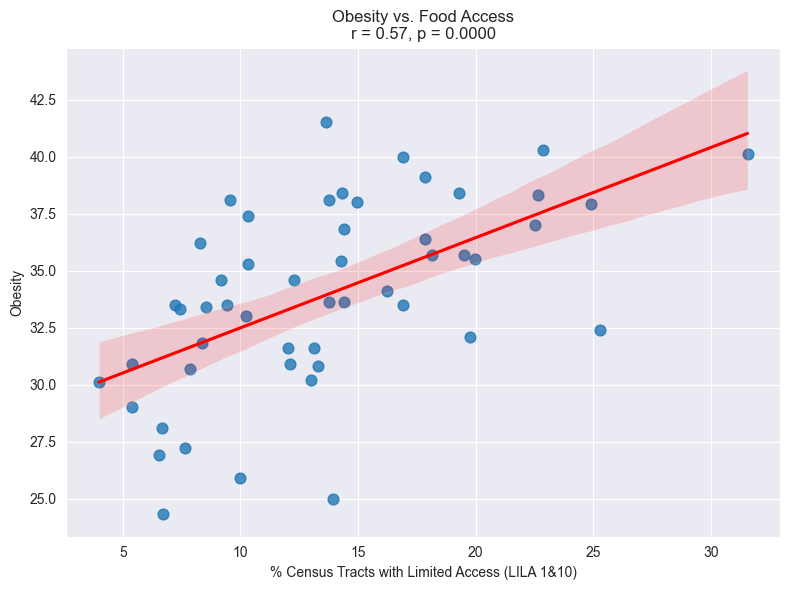

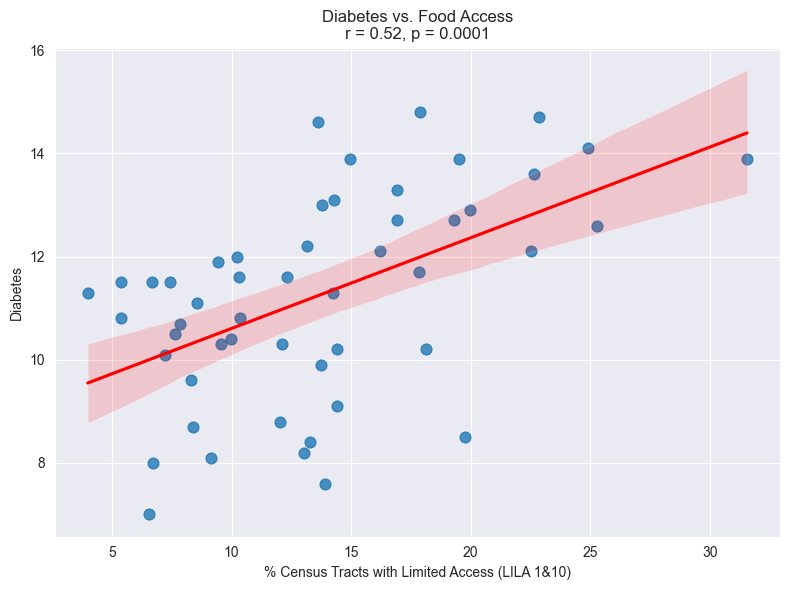

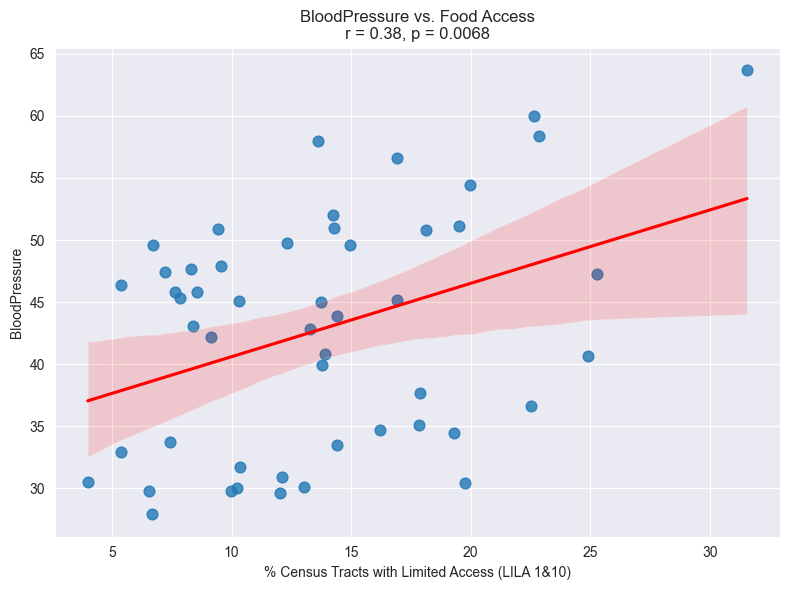

In [5]:
outcomes = ["Obesity", "Diabetes", "BloodPressure"]
for outcome in outcomes:
    x = df["percent_lila_1and10"]
    y = df[outcome]
    valid = df[["percent_lila_1and10", outcome]].dropna()
    r, p = pearsonr(valid["percent_lila_1and10"], valid[outcome])

    plt.figure(figsize=(8, 6))
    sns.regplot(data=valid, x="percent_lila_1and10", y=outcome, scatter_kws={"s": 60}, line_kws={"color": "red"})
    plt.title(f"{outcome} vs. Food Access\nr = {r:.2f}, p = {p:.4f}")
    plt.xlabel("% Census Tracts with Limited Access (LILA 1&10)")
    plt.ylabel(outcome)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Top/Bottom 10 States by Outcome

C:\Users\mjben\AppData\Local\Temp\ipykernel_45144\934102059.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x=outcome, y="State", palette="Reds_r")


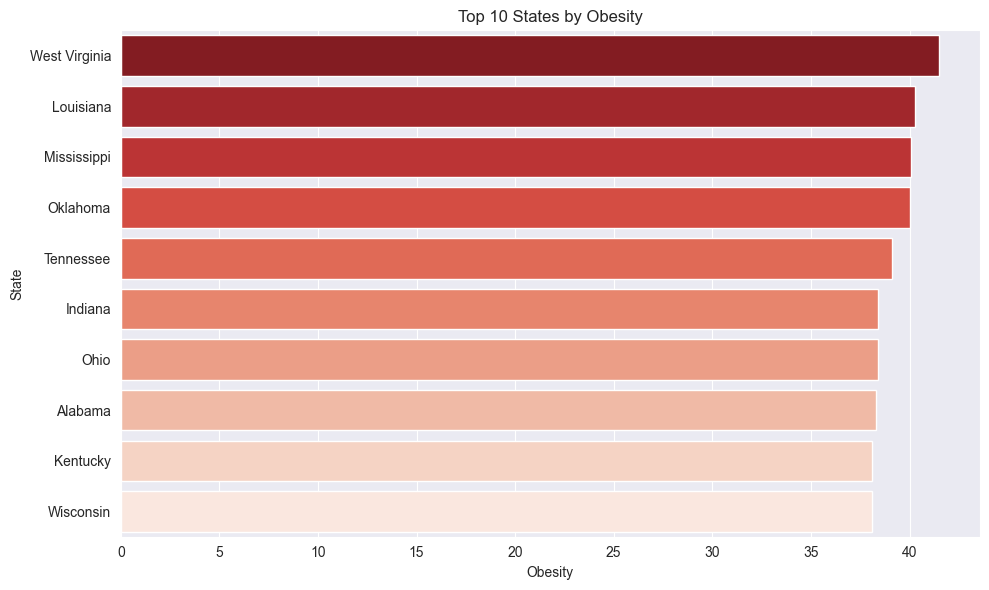

C:\Users\mjben\AppData\Local\Temp\ipykernel_45144\934102059.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10, x=outcome, y="State", palette="Greens")


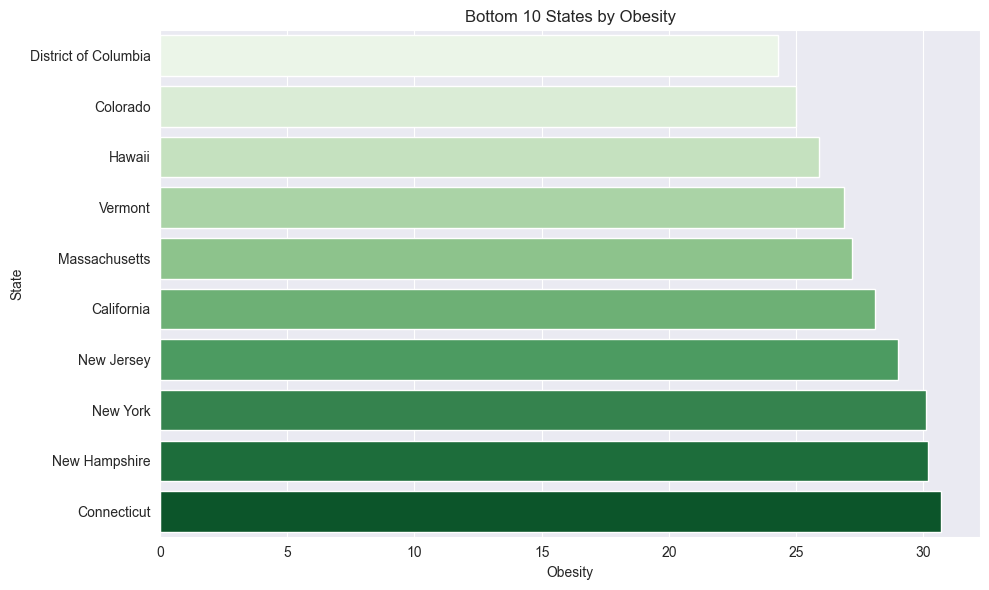

C:\Users\mjben\AppData\Local\Temp\ipykernel_45144\934102059.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x=outcome, y="State", palette="Reds_r")


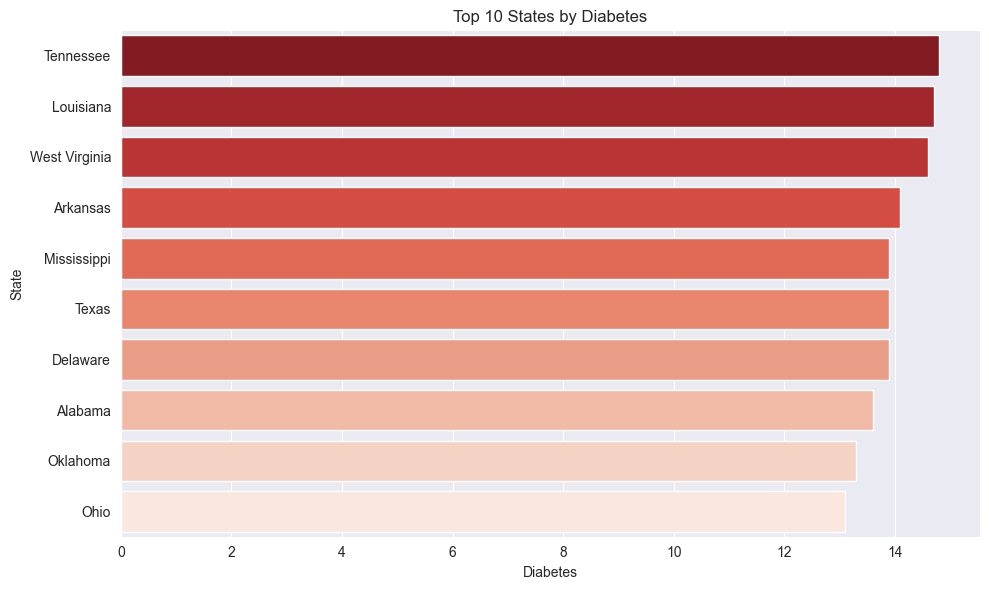

C:\Users\mjben\AppData\Local\Temp\ipykernel_45144\934102059.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10, x=outcome, y="State", palette="Greens")


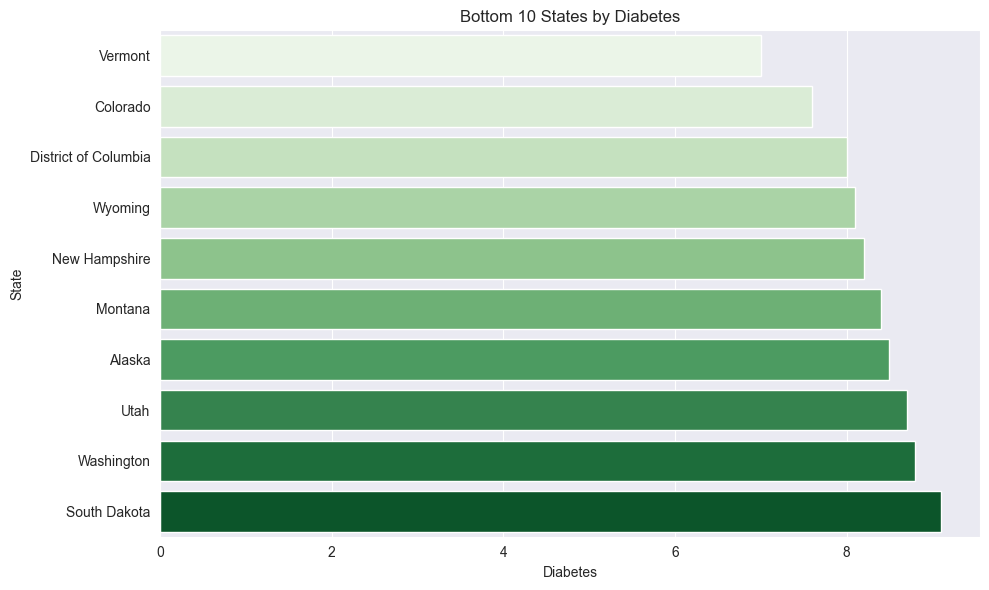

C:\Users\mjben\AppData\Local\Temp\ipykernel_45144\934102059.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x=outcome, y="State", palette="Reds_r")


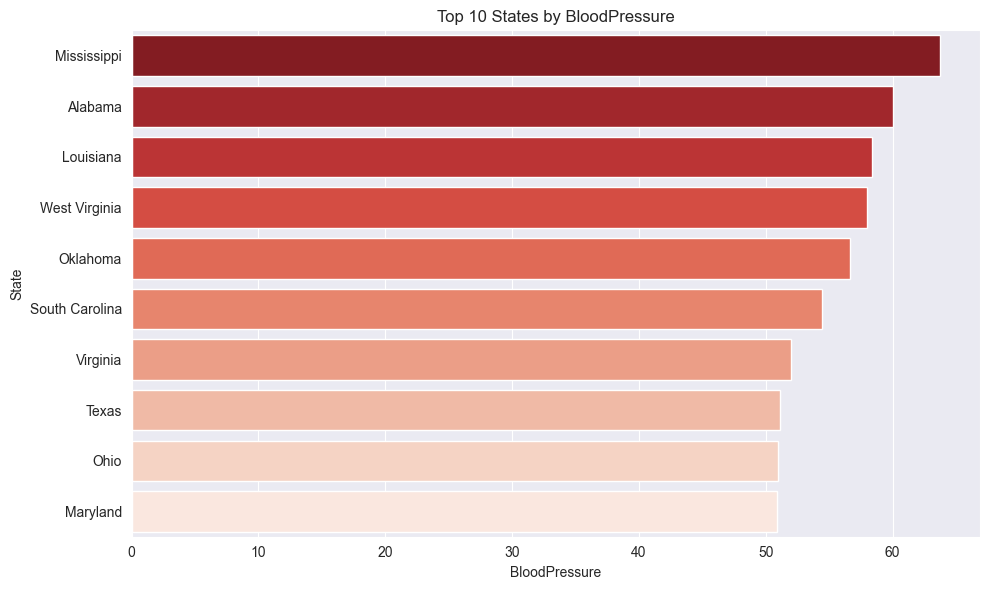

C:\Users\mjben\AppData\Local\Temp\ipykernel_45144\934102059.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10, x=outcome, y="State", palette="Greens")


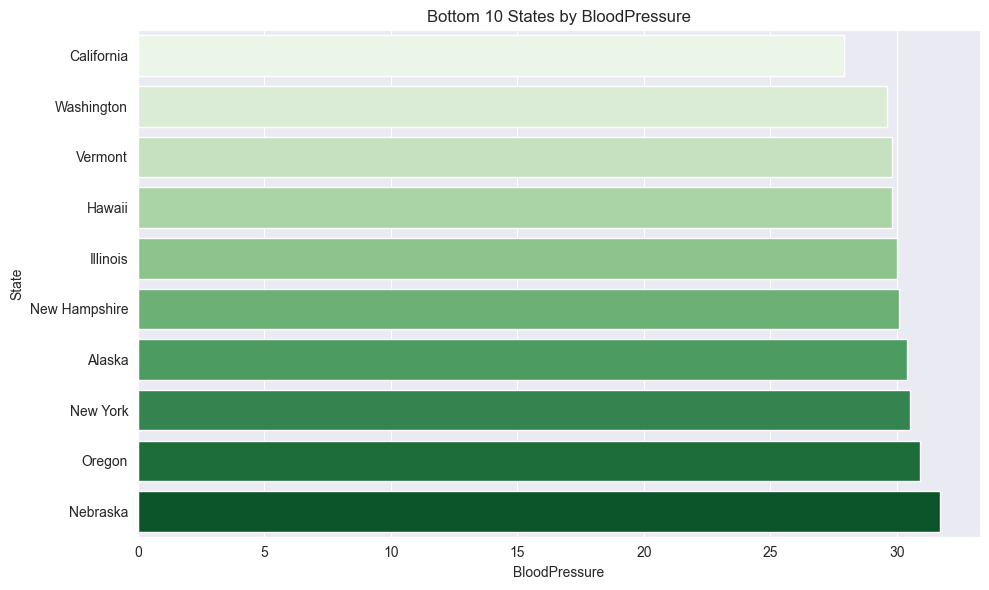

In [9]:
for outcome in outcomes:
    top10 = df.sort_values(outcome, ascending=False).head(10)
    bottom10 = df.sort_values(outcome, ascending=True).head(10)

    # Top 10
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top10, x=outcome, y="State", palette="Reds_r")
    plt.title(f"Top 10 States by {outcome}")
    plt.tight_layout()
    plt.show()

    # Bottom 10
    plt.figure(figsize=(10, 6))
    sns.barplot(data=bottom10, x=outcome, y="State", palette="Greens")
    plt.title(f"Bottom 10 States by {outcome}")
    plt.tight_layout()
    plt.show()
